## AIR QUALITY DATASET

#### The air quality dataset contains 52,560 observations with seven numerical features: CO, NO2, SO2, O3, PM2.5, PM10, and AQI, representing key air pollutants and the Air Quality Index. This dataset is used to predict AQI values through regression, capturing the relationships between pollutant concentrations and air quality.

Importing Libraries and dataset

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data=pd.read_csv(r"C:\Users\aziya\Downloads\Air_Quality.csv")
data

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
...,...,...,...,...,...,...,...,...,...
52555,2023-12-31 19:00:00+00:00,Sydney,74.0,8.30,3.50,25.0,11.0,20.0,25.341667
52556,2023-12-31 20:00:00+00:00,Sydney,75.0,8.20,3.90,25.0,12.0,21.9,25.200003
52557,2023-12-31 21:00:00+00:00,Sydney,76.0,7.90,4.20,26.0,14.5,26.7,25.133339
52558,2023-12-31 22:00:00+00:00,Sydney,77.0,7.40,4.40,28.0,13.5,24.7,25.116669


Cleaning data

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


In [71]:
data.isnull().sum()

Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [72]:
data.duplicated().sum()

0

In [73]:
data.round(2)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.16
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.82
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.47
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.07
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.32
...,...,...,...,...,...,...,...,...,...
52555,2023-12-31 19:00:00+00:00,Sydney,74.0,8.30,3.50,25.0,11.0,20.0,25.34
52556,2023-12-31 20:00:00+00:00,Sydney,75.0,8.20,3.90,25.0,12.0,21.9,25.20
52557,2023-12-31 21:00:00+00:00,Sydney,76.0,7.90,4.20,26.0,14.5,26.7,25.13
52558,2023-12-31 22:00:00+00:00,Sydney,77.0,7.40,4.40,28.0,13.5,24.7,25.12


In [74]:
data.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980


In [75]:
data.drop(columns=["Date","City"],inplace=True)

Scaling the data

In [76]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)

Correlation

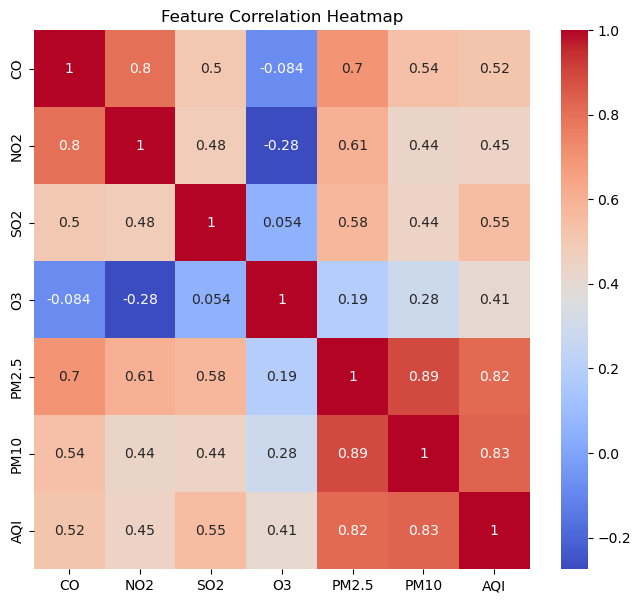

In [77]:
plt.figure(figsize=(8, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Finding outliers and removing outliers

In [78]:
z_scores = data.apply(zscore)
threshold = 3
outliers_zscore = (z_scores.abs() > threshold)
outliers_zscore_count = outliers_zscore.sum()
print("Number of outliers per column (Z-score method):")
print(outliers_zscore_count)

Number of outliers per column (Z-score method):
CO        972
NO2      1040
SO2       978
O3        613
PM2.5     941
PM10     1362
AQI       606
dtype: int64


In [ ]:
from scipy.stats import zscore
z_scores = data.apply(zscore)
threshold = 3
mask = (z_scores.abs() < threshold).all(axis=1)
datas = data[mask]
print("Original shape:", data.shape)
print("Shape after removing outliers:", datas.shape)

Original shape: (52560, 7)
Shape after removing outliers: (48276, 7)


In [80]:
print(datas.columns.tolist())

['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']


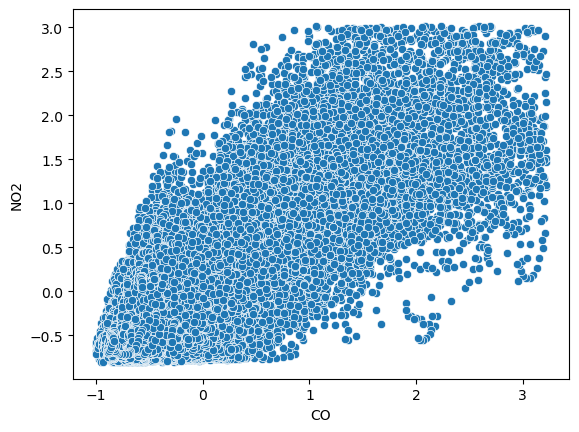

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='CO', y='NO2',data= datas)
plt.show()

As no relation can be find in the data while ploting nonlinear regression algorithms can be used.

Splitting the data

In [82]:
x = datas.iloc[:,:-1]
y = datas.iloc[:,-1]

In [83]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

### Random Forest

In [87]:
from  sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5, max_features="sqrt",random_state=42)
model2.fit(x_train, y_train)
y_train_pred2 = model2.predict(x_train)
y_test_pred2 = model2.predict(x_test)

In [88]:
from sklearn.metrics import r2_score, mean_squared_error

train_accuracy = r2_score(y_train, y_train_pred2)
test_accuracy = r2_score(y_test, y_test_pred2)

print("Training Accuracy (R² score):", train_accuracy*100)
print("Testing Accuracy (R² score):", test_accuracy*100)

Training Accuracy (R² score): 88.44004742208332
Testing Accuracy (R² score): 86.08630361957204


### DECISION TREE

In [90]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth=3,random_state=42)
model1.fit(x_train, y_train)
y_train_pred1 = model1.predict(x_train)
x_test_pred1 = model1.predict(x_test)


In [91]:
from sklearn.metrics import r2_score, mean_squared_error

train_accuracy = r2_score(y_train, y_train_pred2)
test_accuracy = r2_score(y_test, y_test_pred2)

print("Training Accuracy (R² score):", train_accuracy*100)
print("Testing Accuracy (R² score):", test_accuracy*100)

Training Accuracy (R² score): 88.44004742208332
Testing Accuracy (R² score): 86.08630361957204


##### The air quality dataset, comprising 52,560 observations and six numerical features (CO, NO2, SO2, O3, PM2.5, PM10) with AQI as the target variable, was used to train and evaluate two regression models: a Decision Tree Regressor and a Random Forest Regressor. Both models achieved identical performance metrics, with a training R² score of 88.44% and a testing R² score of 86.09%. These results indicate that both models effectively capture the relationships between the air pollutants and AQI, with the Random Forest Regressor likely providing greater robustness due to its ensemble nature, while the Decision Tree Regressor offers interpretability, making both suitable for predicting AQI in this context